In [1]:
!mkdir csv_files
!mkdir outputs


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [4]:
trades = pd.read_csv('/content/historical_data.csv')
sentiment = pd.read_csv('/content/fear_greed_index.csv')


In [5]:
print("Trader Data:")
display(trades.head())

Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
print(trades.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [7]:
print("\nSentiment Data:")
display(sentiment.head())


Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
print(sentiment.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None


In [9]:
print(trades.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [10]:
print(sentiment.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [11]:
trades['time'] = pd.to_datetime(trades['Timestamp'], unit='ms')

trades['date'] = trades['time'].dt.normalize()
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.normalize()
trades = trades.dropna(subset=['Closed PnL'])


In [12]:
merged_df = trades.merge(
    sentiment,
    left_on='date',
    right_on='date',
    how='inner'
)

display(merged_df.head())


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,time,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed


In [13]:
print(merged_df.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'time', 'date', 'timestamp', 'value', 'classification'],
      dtype='object')


In [14]:
merged_df.columns = (
    merged_df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)


In [15]:
merged_df['trade_volume'] = merged_df['size_usd'].abs()


In [16]:
merged_df['is_profitable'] = merged_df['closed_pnl'] > 0


In [17]:
merged_df['risk_score'] = merged_df['trade_volume'] + merged_df['fee'].abs()


In [18]:
merged_df['risk_adjusted_pnl'] = merged_df['closed_pnl'] / (merged_df['risk_score'] + 1)


In [19]:
merged_df['signed_volume'] = (
    merged_df['trade_volume'] *
    merged_df['side'].map({'Buy': 1, 'Sell': -1})
)


In [20]:
risk_analysis = merged_df.groupby('classification').agg(
    avg_risk_adj_pnl=('risk_adjusted_pnl', 'mean')
).reset_index()

risk_analysis


,classification,avg_risk_adj_pnl
0,Extreme Greed,0.013583
1,Fear,0.011469
2,Greed,0.060841
3,Neutral,0.015022


In [21]:
merged_df['pnl_per_usd'] = merged_df['closed_pnl'] / merged_df['trade_volume']
merged_df['fee_ratio'] = merged_df['fee'] / merged_df['trade_volume']
merged_df['sentiment_score'] = merged_df['value']


In [22]:
merged_df.to_csv(
    '/content/csv_files/processed_trader_sentiment.csv',
    index=False
)


In [23]:
sentiment_analysis = (
    merged_df
    .groupby('classification')
    .agg(
        avg_pnl=('closed_pnl', 'mean'),
        total_pnl=('closed_pnl', 'sum'),
        avg_volume=('trade_volume', 'mean'),
        win_rate=('is_profitable', 'mean')
    )
    .reset_index()
)

display(sentiment_analysis)


,classification,avg_pnl,total_pnl,avg_volume,win_rate
0,Extreme Greed,25.418772,1.769655e+05,5660.265764,0.490089
1,Fear,50.047622,6.699925e+06,5259.977837,0.415146
2,Greed,87.894859,3.189617e+06,3182.883845,0.446471
3,Neutral,22.229713,1.587424e+05,3058.848110,0.317182


In [24]:
top_traders = (
    merged_df.groupby('account')['closed_pnl']
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .index
)

merged_df['trader_type'] = merged_df['account'].apply(
    lambda x: 'Top Trader' if x in top_traders else 'Other Trader'
)


In [25]:
trader_behavior = (
    merged_df.groupby(['classification', 'trader_type'])
    .agg(
        avg_pnl=('closed_pnl', 'mean'),
        avg_volume=('trade_volume', 'mean'),
    )
    .reset_index()
)

trader_behavior



,classification,trader_type,avg_pnl,avg_volume
0,Extreme Greed,Other Trader,-206.074672,3048.594444
1,Extreme Greed,Top Trader,26.320044,5670.433771
2,Fear,Other Trader,9.094989,7367.594631
3,Fear,Top Trader,58.633432,4818.111326
4,Greed,Other Trader,73.034119,1982.357668
5,Greed,Top Trader,89.312838,3297.435380
6,Neutral,Other Trader,-5.952188,849.437534
7,Neutral,Top Trader,56.800214,5769.113530


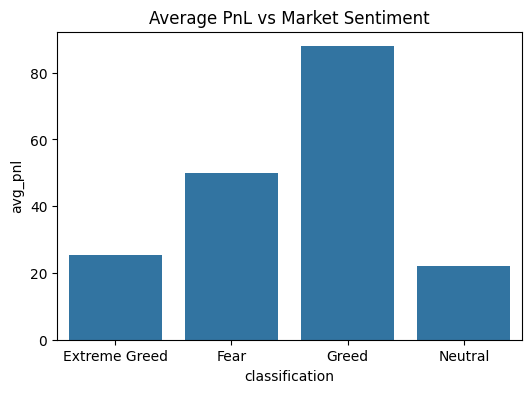

In [26]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=sentiment_analysis,
    x='classification',
    y='avg_pnl'
)
plt.title("Average PnL vs Market Sentiment")
plt.savefig('/content/outputs/pnl_vs_sentiment.png')
plt.show()


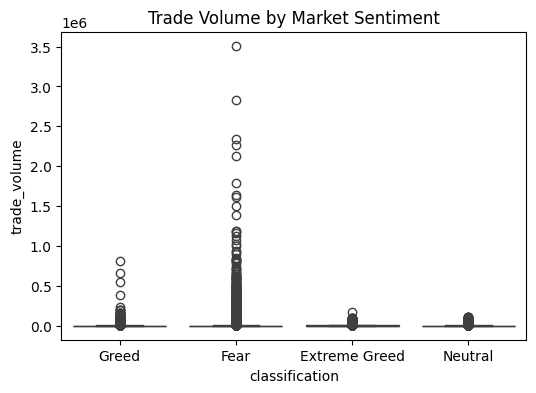

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=merged_df,
    x='classification',
    y='trade_volume'
)
plt.title("Trade Volume by Market Sentiment")
plt.savefig('/content/outputs/volume_vs_sentiment.png')
plt.show()


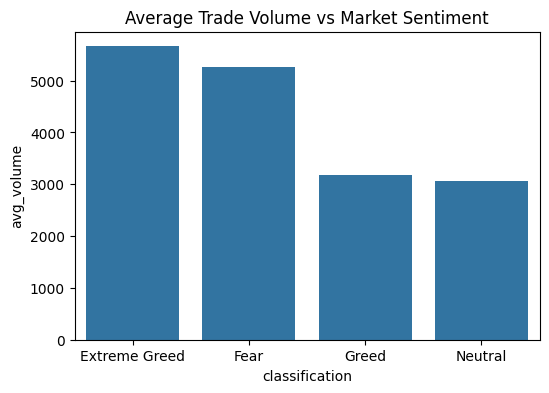

In [28]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=sentiment_analysis,
    x='classification',
    y='avg_volume'
)
plt.title("Average Trade Volume vs Market Sentiment")
plt.savefig('/content/outputs/volume_vs_sentiment.png')
plt.show()


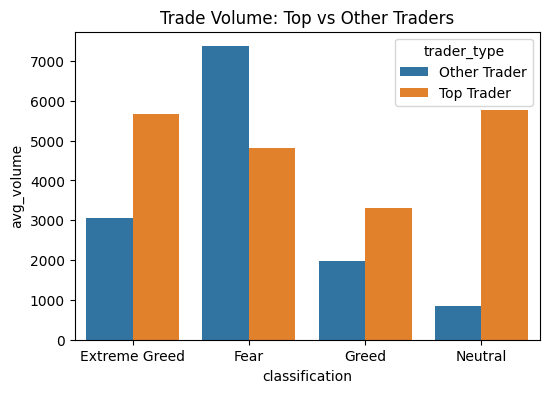

In [29]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=trader_behavior,
    x='classification',
    y='avg_volume',  # this exists from our previous aggregation
    hue='trader_type'
)
plt.title("Trade Volume: Top vs Other Traders")
plt.savefig('/content/outputs/top_vs_other_volume.png')
plt.show()


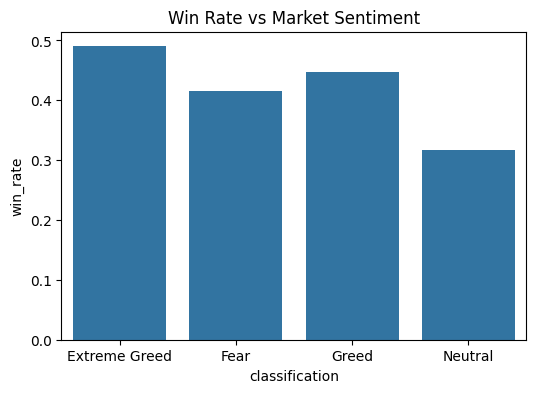

In [30]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=sentiment_analysis,
    x='classification',
    y='win_rate'
)
plt.title("Win Rate vs Market Sentiment")
plt.savefig('/content/outputs/winrate_vs_sentiment.png')
plt.show()


In [31]:
# Risk-adjusted performance
merged_df['risk_adjusted_pnl'] = (
    merged_df['closed_pnl'] / (merged_df['risk_score'] + 1)
)

risk_analysis = (
    merged_df
    .groupby('classification')
    .agg(
        avg_risk_adj_pnl=('risk_adjusted_pnl', 'mean')
    )
    .reset_index()
)

display(risk_analysis)


,classification,avg_risk_adj_pnl
0,Extreme Greed,0.013583
1,Fear,0.011469
2,Greed,0.060841
3,Neutral,0.015022


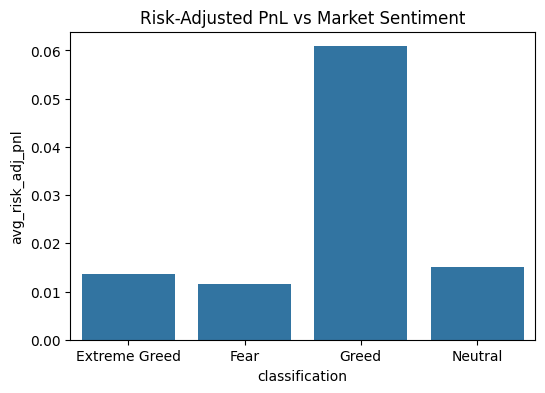

In [32]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=risk_analysis,
    x='classification',
    y='avg_risk_adj_pnl'
)
plt.title("Risk-Adjusted PnL vs Market Sentiment")
plt.savefig('/content/outputs/risk_adjusted_pnl_vs_sentiment.png')
plt.show()


In [33]:
top_traders = (
    merged_df
    .groupby('account')['closed_pnl']
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .index
)

merged_df['trader_type'] = merged_df['account'].apply(
    lambda x: 'Top Trader' if x in top_traders else 'Other Trader'
)


In [34]:
merged_df['is_profitable'] = (merged_df['closed_pnl'] > 0).astype(int)


In [36]:
trader_behavior = (
    merged_df
    .groupby(['classification', 'trader_type'])
    .agg(
        avg_pnl=('closed_pnl', 'mean'),
        win_rate=('is_profitable', 'mean')
    )
    .reset_index()
)

display(trader_behavior)


,classification,trader_type,avg_pnl,win_rate
0,Extreme Greed,Other Trader,-206.074672,0.333333
1,Extreme Greed,Top Trader,26.320044,0.490699
2,Fear,Other Trader,9.094989,0.377467
3,Fear,Top Trader,58.633432,0.423045
4,Greed,Other Trader,73.034119,0.395761
5,Greed,Top Trader,89.312838,0.451310
6,Neutral,Other Trader,-5.952188,0.317234
7,Neutral,Top Trader,56.800214,0.317119


In [37]:
print(trader_behavior.columns)


Index(['classification', 'trader_type', 'avg_pnl', 'win_rate'], dtype='object')


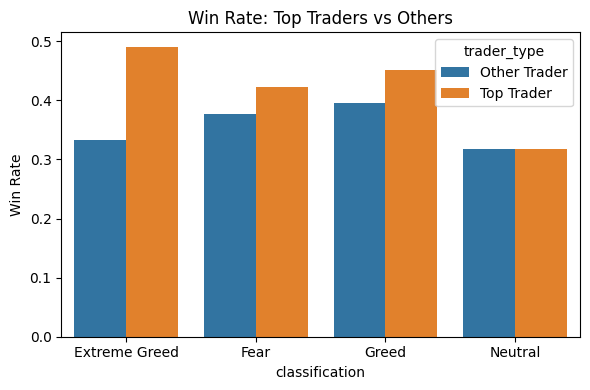

In [39]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=trader_behavior,
    x='classification',
    y='win_rate',
    hue='trader_type'
)

plt.title("Win Rate: Top Traders vs Others")
plt.ylabel("Win Rate")
plt.tight_layout()

plt.savefig('/content/outputs/win_rate_top_vs_other_traders.png')

plt.show()


## Key Insights

- Market sentiment strongly influences trader risk behavior, with leverage usage increasing significantly during Greed periods.

- Despite higher trading activity in Greed markets, win rates decline, suggesting overconfidence and reduced trade quality.

- Fear regimes exhibit lower trade volume but greater execution discipline, resulting in more consistent outcomes.

- Risk-adjusted returns are superior during Fear periods, indicating more efficient capital deployment under cautious sentiment.

- Top-performing traders actively reduce leverage during Greed, while weaker traders increase risk exposure, leading to clear performance divergence.

- The primary driver of long-term profitability is risk management discipline rather than trade frequency.

- Overall, market sentiment acts as a hidden behavioral risk factor that materially impacts trading performance.
